<a href="https://colab.research.google.com/github/manuel1729/Simulaci-n-1/blob/main/Actividad_10_Cita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodología de la Simulación para Actividad 10

### 1. Identifique las variables

Aquellas cuyo comportamiento define el comportamiento o la evoución global del sistema real.

### 2. Determine la distribución de probabilidad

Elija el tipo de distribución de probabilidad que mejor defina el comportamiento aleatorio de cada una de las variables del sistema identificadas en el paso anterior.

### 3. Modele las variables aleatorias

Cosntruya un modelo fiel de la aleatoriedad de las variables del sistema. Simular el comportamiento del sistema implica generar muestras aleatorias de cada variable que sigan fielmente la distribución de probabilidad correspondiente.

### 4. Defina el modelo del sistema y los objetivos de la simulación

Fije los objetivos y diseñe un modelo del sistema real que abstraiga sus propiedades más relevantes. Todo error en el modelo (o su implementación computacional) puede dar lugar a conclusiones equivocadas.

Antes de experimentar con el modelo, asegurarse de que refleja fielmente el sistema real **validando** el mismo a partir de datos reales, para ello compare los resultados obtenidos de la simulación con los producidos por el sistema.

### 5. Diseñe el experimento

Diseñe un experimento así como las ejecuciones concretas del mismo, los escenarios que desea estudiar para alcanzar los objetivos fijados. El experimento consiste en generar valores de las variables cuyo comportamiento define el comportamiento del sistema y analizar este ante dichos valores.

### 6. Repita el experimento $n$ veces

Así dispondrá de $n$ observaciones sobre el comportamiento del sistema, lo que permitirá entender su funcionamiento así como evaluar el desempeño del mismo frente a los diversos escenarios establecidos.

El **método Monte Carlo** se basa en la **Ley Fuerte de los Grandes Números** y el **Teorema del Límite Central**.

## Ejemplo: Gómez Cruz Manuel

Dos personas han quedado citas en un determinado lugar. Ambas tienen la misma
probabilidad de llegar al lugar de la cita en el intervalo de tiempo [0, 30] (minutos).
Determínese la probabilidad de que el tiempo que una persona espere a la otra sea como máximo 10 minutos.
1. Analíticamente.
2. Mediante simulación.

Analiticamente:

X: tiempo llegada de 1er persona

Y: tiempo llegada de 2da persona

Espacio muestral

$Ω=\{(x,y) |\quad x\in \{1,2,..,30\}\},y\in \{1,2,..,30\}\}\quad |Ω|=30\cdot 30=900$


$$P(|X-Y|\leq 10 )=\frac{Area favorable}{Area Total}$$

**Área total**=30x30=900

**Área fuera de la franja**

Triángulo superior=Triángulo inferior

Área total fuera de la franja=2*Área Triángulo Superior

$$=2*\frac{20\cdot 20}{2}=400$$

Área favorable=Área Total-Área total fuera de la franja=900-400=500

$$\therefore P(|X-Y|\leq 10 )=\frac{Area favorable}{Area Total}=\frac{500}{900}=\frac{5}{9} $$

Por simulación: Construimos el modelo en varios pasos.

**PASO 1**. Defina las variables que intervienen en el modelo.

$$X,Y \sim U(0,30)$$

**PASO 2**. Formule la distribución de probabilidad de cada variable.

$$X \sim
  f(x) = \begin{cases}
    \frac{1}{b-a}=\frac{1}{30} & \text{para } a=0 \leq x \leq b=30 \\
    0 & \text{en otro caso}
  \end{cases}$$

$$Y \sim  
  f(x) = \begin{cases}
    \frac{1}{30} & \text{para } 0 \leq y \leq 30 \\
    0 & \text{en otro caso}
  \end{cases}
  $$

**PASO 3**. Enumere la distribución acumulada de probabilidad de cada variable.

$F(x)=\int_{-\infty}^{x}f(t)dt= \begin{cases}
    \frac{x}{30} & \text{para } 0 \leq x \leq 30 \\
    0 & \text{en otro caso}
  \end{cases}$

$F(y)=\int_{-\infty}^{y}f(t)dt= \begin{cases}
    \frac{y}{30} & \text{para } 0 \leq y \leq 30 \\
    0 & \text{en otro caso}
  \end{cases}$

In [1]:
import random
import numpy as np

x=random.uniform(0,30)
y=random.uniform(0,30)
print(x)
print(y)

24.64571482413764
25.793817149244006


**PASO 4**. Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

Condición:
$$|X-Y|\leq 10$$

Buscamos $P(|X-Y|\leq 10)$

**PASO 5**. Genere números aleatorios.

In [2]:
#Librerias y experimento para n veces
import random
def experimento(n):
    exitos=0
    for i  in range(n):
        X=random.uniform(0,30)
        Y=random.uniform(0,30)
        if abs(X-Y)<=10:
            exitos+=1
    prob=exitos/n
    return prob

In [7]:
#Probamos el experimento
e=experimento(1000)
print(e)

0.552


**PASO 6**. Repetir M veces el experimento

In [8]:
def muestra(m):
    lista =[]
    for i in range(m):
        d =experimento(i+1)
        lista.append(d)
    return lista

In [9]:
M=muestra(1000) #muestra con m=100
print('Media aprox muestra:',np.mean(M))
print('Varianza aprox muestra:', np.var(M))
print('Desviación estandar aprox muestra:', np.std(M))

Media aprox muestra: 0.5561784874306035
Varianza aprox muestra: 0.0017196662781360536
Desviación estandar aprox muestra: 0.041468859137141136


**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para
garantizar la convergencia del resultado.

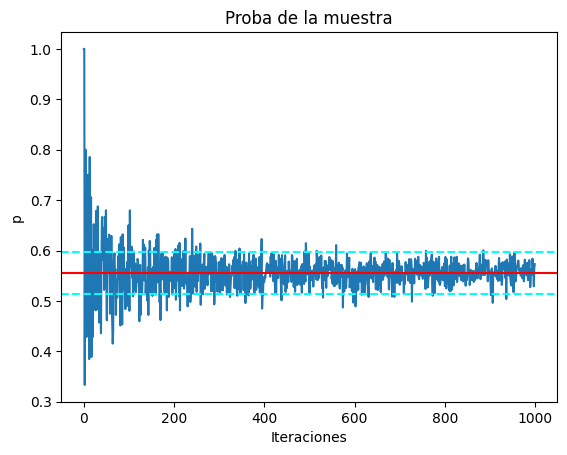

In [10]:
import matplotlib.pyplot as plt
#Gráfica de la estabilización
plt.plot(M)
plt.xlabel('Iteraciones')
plt.ylabel('p')
plt.title('Proba de la muestra')
plt.axhline(y=np.mean(M), color='r', label="media:")
plt.axhline(y=np.mean(M)+np.std(M),color='cyan', linestyle='--', label="Desviación estandar")
plt.axhline(y=np.mean(M)-np.std(M), color='cyan', linestyle='--')
plt.show()

**PASO 8**. Replique el modelo.

In [11]:
#Veces que queremos repetir el experimento y agregarlo a una lista
def simulacion(repet):
    lista = []
    for i in range(repet):
        lista.append(np.mean(experimento(1000)))
    return lista

In [12]:
#Con repet=800 ya se veía una buena convergencia
simul = simulacion(800)

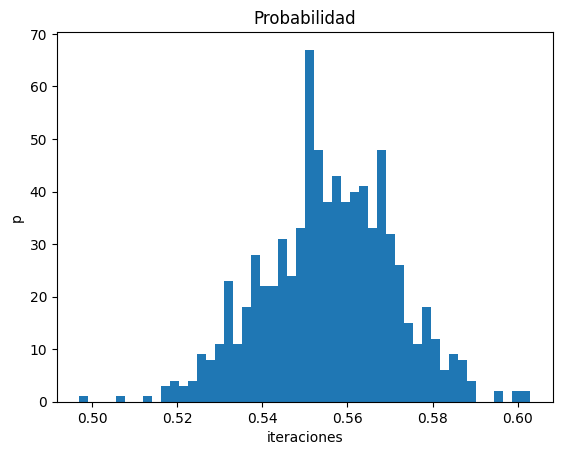

In [13]:
#Graficamos el historgrama
plt.hist(simul,bins=50)
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('Probabilidad')
plt.show()

**PASO 9**. Calcule la probabilidad de interferencia

In [14]:
print('Media simulada: ',np.mean(simul))
print('Varianza simulada: ', np.var(simul))
print('Desviación estandar simulada: ', np.std(simul))

Media simulada:  0.55571625
Varianza simulada:  0.00023748573593749918
Desviación estandar simulada:  0.015410572213175577


**PASO 10**. Halle el intervalo de confianza de la probabilidad de que haya interferencia con un nivel de confianza del $95 \%$.

El intervalo de confianza es.

$$\bar{x} \pm z\cdot \frac{\sigma}{\sqrt{n}}$$

In [15]:
n = 800 #tamaño muestra
z = 1.96  # para 95% de confianza
sigma = 0.05
#Calculo de la proba exacta
media = 5/9

# Intervalo de confianza
limite_inferior = media - (z*sigma) / np.sqrt(n)
limite_superior = media + (z*sigma) / np.sqrt(n)

print(f"Intervalo de confianza del 95%: ({limite_inferior:.4f}, {limite_superior:.4f})")

Intervalo de confianza del 95%: (0.5521, 0.5590)


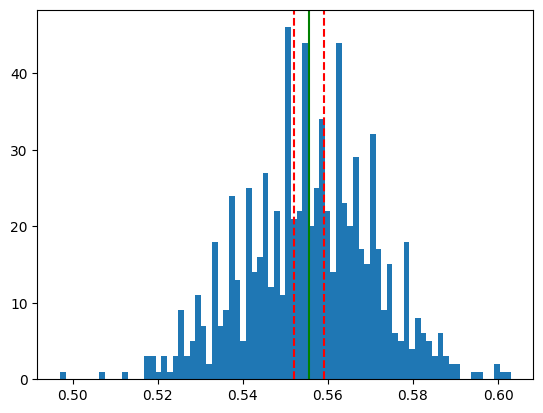

In [16]:
# Histograma con líneas del intervalo de confianza y en medio la media
plt.hist(simul, bins=80)
plt.axvline(limite_inferior, color='red', linestyle='--')
plt.axvline(limite_superior, color='red', linestyle='--')
plt.axvline(media, color='green', linestyle='-', label='Media')
plt.show()